In [1]:
# Importing libaries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
pd.set_option('display.max_columns',False)

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#### Reading and Understanding of the Data

In [3]:
lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
lead_df.shape

(9240, 37)

### Data Cleaning
- As we have seen the dataframe contains some 'select' values which means these are missing values.

In [7]:
# Replacing select values with nan values
lead_df = lead_df.replace('Select',np.nan)

In [8]:
#checking if there is any other missing values.
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

- we found lots of Missing values which should be removed.

In [9]:
# Checking for duplicate values
lead_df.loc[lead_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [10]:
# Dropping the column of large number of missing values.
cols = lead_df.columns[round((lead_df.isnull().sum()/len(lead_df))*100)>=40]
lead_df = lead_df.drop(cols,1)

In [11]:
#dropping "tags" as these features is derived by sales team
lead_df.drop('Tags',1,inplace= True)

In [12]:
lead_df.drop('TotalVisits',1,inplace= True)

In [13]:
# finding the labels contains in the country variable
lead_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [14]:
# imputing 'India' as its common occurance in country column
lead_df['Country'] = lead_df['Country'].replace(np.nan,'India')

In [15]:
# Finding the labels contains in the specialization variable
lead_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [16]:
# Imputing 'Finance Management' as its common occurance in specialization column
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan,'Finance Management')

In [17]:
# Finding the labels contains in the 'What is your current occupation' Variable
lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [18]:
# Imputing  "Unemployed" as its common occurance in What is your current occupation Column
lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [19]:
# Finding the Labels contains in the "What matters most to you in choosing a course" Variable
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [20]:
# Dropping "What matters most to you in choosing a course" as we have almost same value for colums
lead_df.drop('What matters most to you in choosing a course',1,inplace=True)

In [21]:
# Finding the Labels contains in the "Last Activity Variable
lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [22]:
# Imputing "Email Opened" as its common occurance in Last Activity Column
lead_df['Last Activity']=lead_df['Last Activity'].fillna('Email Opened')

In [23]:
# Finding the Labels contains in the "Last Activity Variable
lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [24]:
# imputing 'Google' as its common occurance in lead source column
lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan,'Google')

In [25]:
# here we have found that google is same just a type hence we replaced it google and Google
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google','Google')

In [26]:
lead_df['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

### Outlier Detection

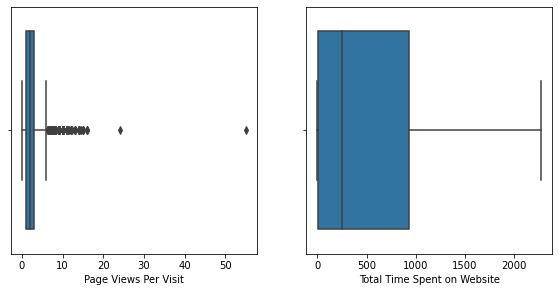

In [28]:
# Finding the outliers
plt.figure(figsize=(15,10))
plt.subplot(2,3,2)
sns.boxplot(lead_df['Page Views Per Visit'])
plt.subplot(2,3,3)
sns.boxplot(lead_df['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')
plt.show()

- Outliers are Present in both the Variables TotalVisits and Page Views Per Visit it should be treated and the value spreaded above median highly in Total Time Spent on Website. Replace Median to the Misssing values.

In [30]:
# Imputing Median as it is a continous type
lead_df['Page Views Per Visit']=lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].median())

In [31]:
lead_df[pd.isnull(lead_df).any(axis=1)==True]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [32]:
lead_df[pd.isnull(lead_df).any(axis=1)==True]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


### checking null values again

In [33]:
round(100*(lead_df.isnull().sum()/len(lead_df)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

- There is no null values remains in the dataset.

In [34]:
# making lead number as index
lead_df=lead_df.set_index('Lead Number')
lead_df.drop(['Prospect ID'],1,inplace=True)

In [35]:
# Storing column with dtype object and column with dtype number in two different list, so we can easily Perform analysis 
col_obj=list(lead_df.loc[:, lead_df.dtypes == np.object].columns)
col_num=list(lead_df.loc[:, lead_df.dtypes == np.int64].columns)
col_num+=(list(lead_df.loc[:, lead_df.dtypes == np.number].columns))
print('columns with object dtype \n {} \n \n columns with number dtype \n {}'.format(col_obj,col_num))

columns with object dtype 
 ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'] 
 
 columns with number dtype 
 ['Converted', 'Total Time Spent on Website', 'Page Views Per Visit']


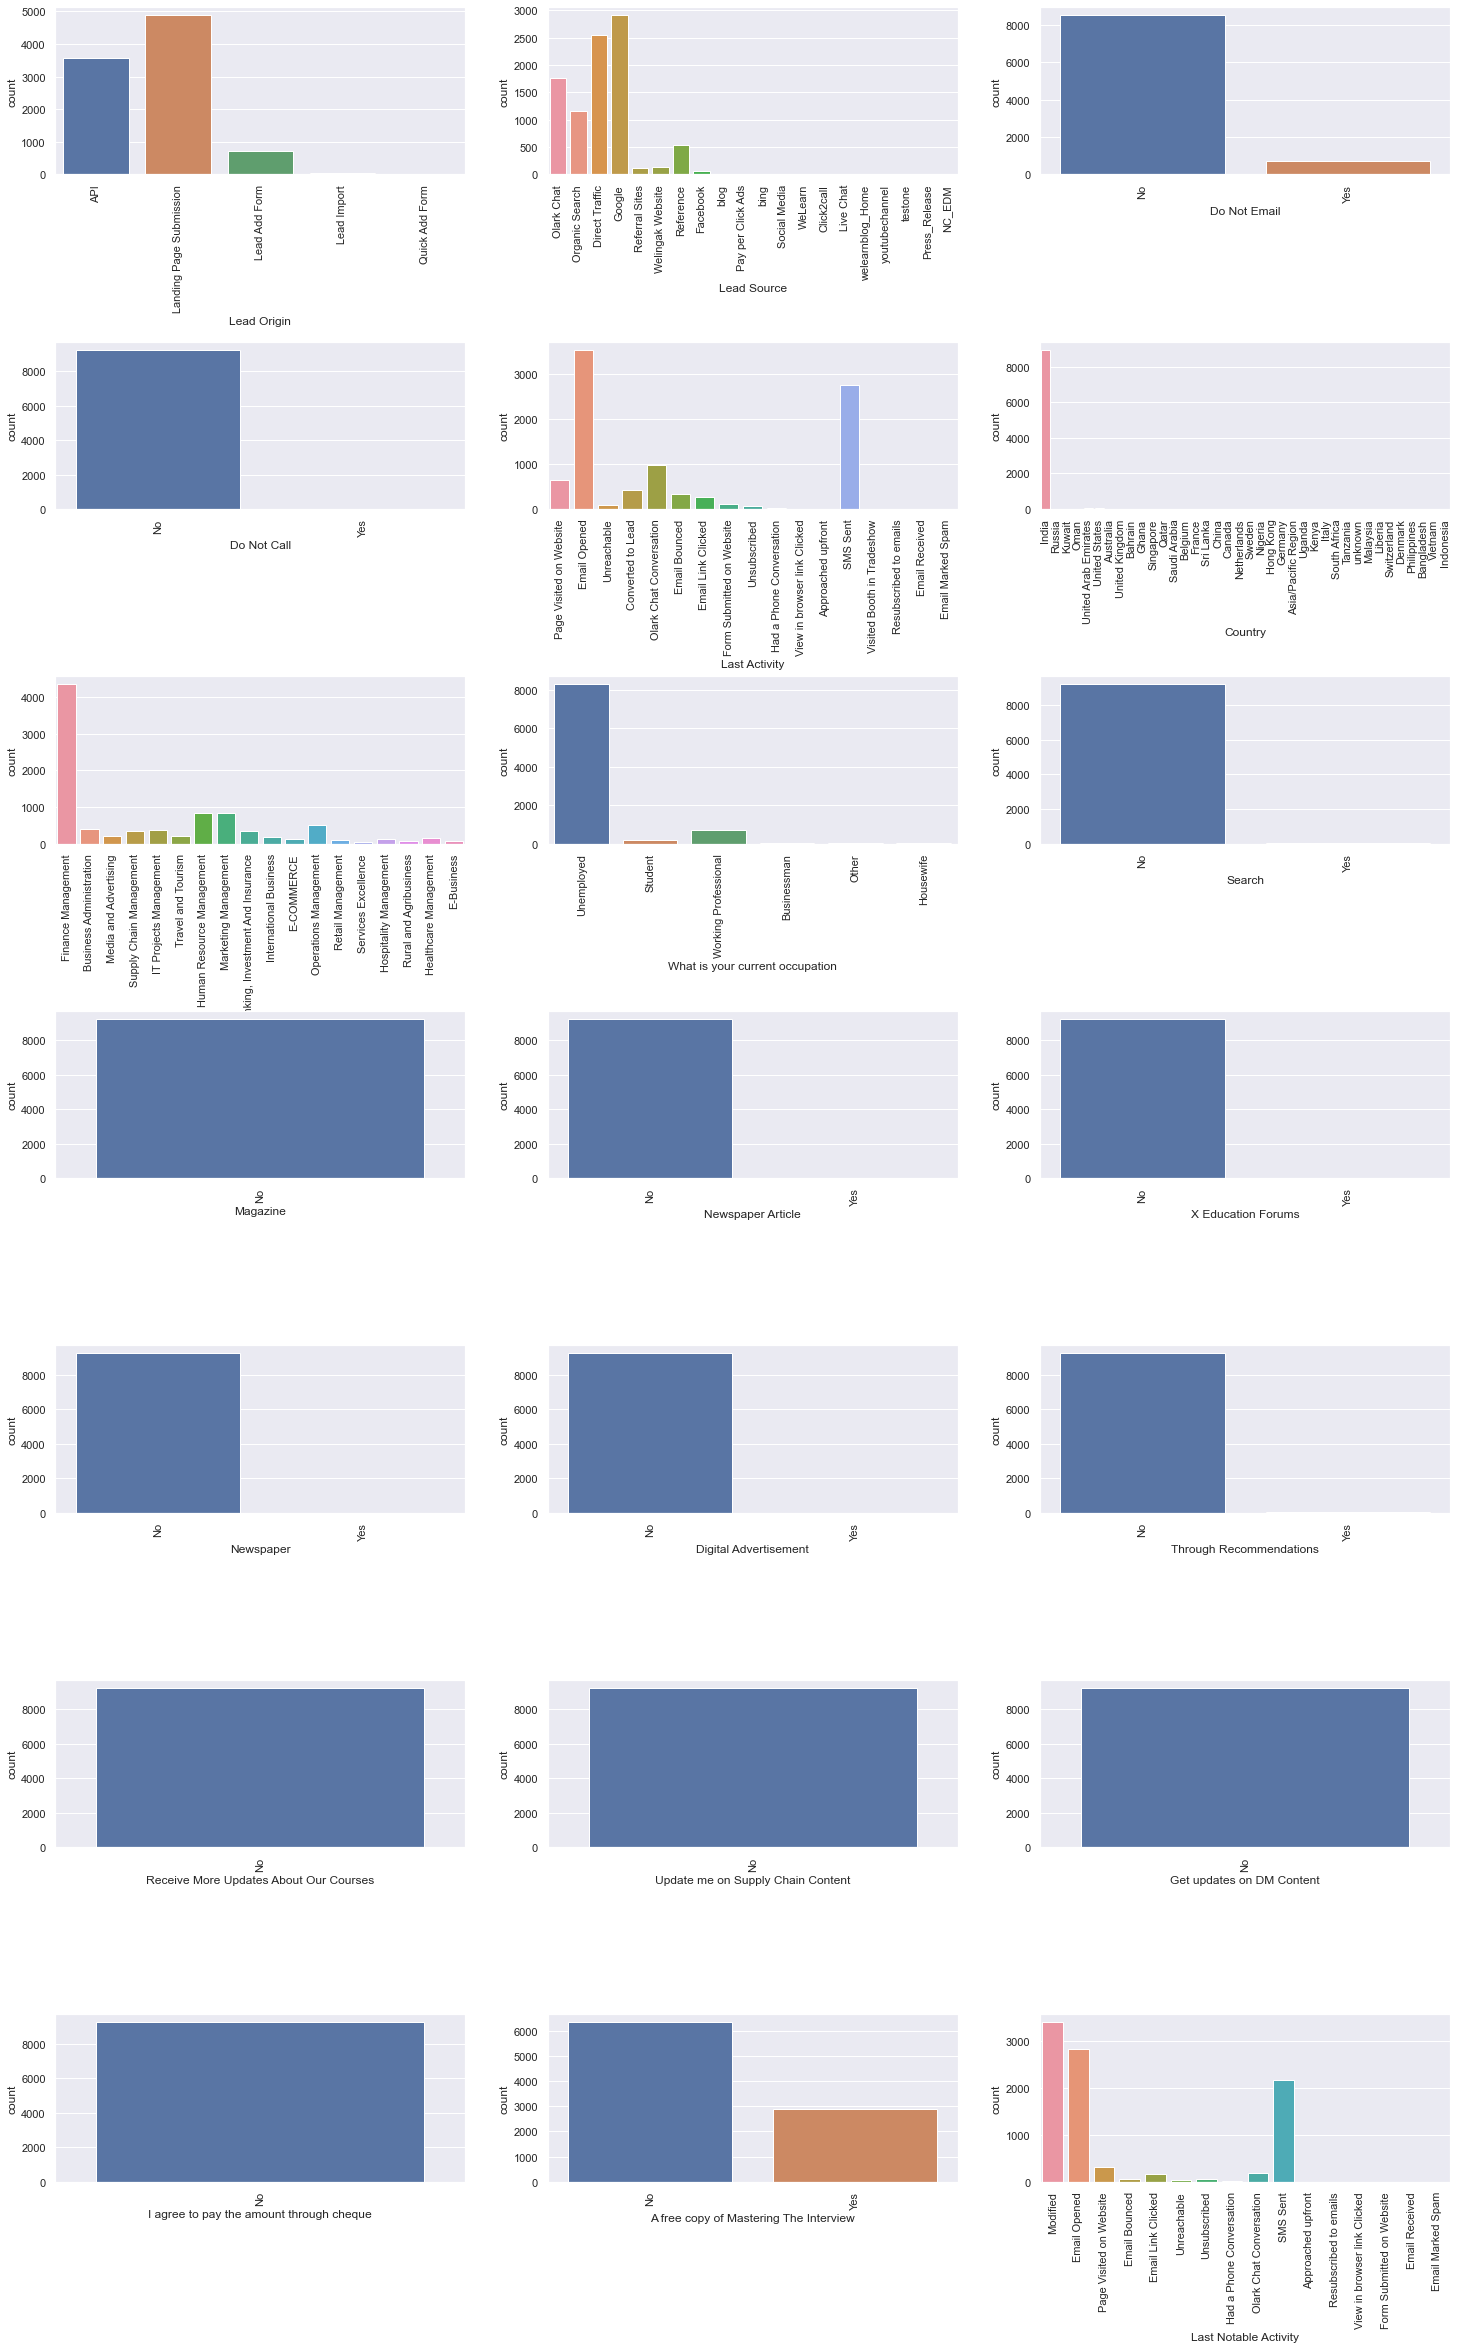

In [36]:
# plotting countplot for object dtype and histogram for number to get data distribution
plt.figure(figsize=(25,40))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1 )
for i in enumerate(col_obj):
    plt.subplot(7,3, i[0]+1)
    sns.countplot(i[1],data=lead_df) 
    plt.xticks(rotation=90)
plt.show()

### observation:
- we saw that many column has only one values i.e 'Magazine' so we can remove these columns.
- these column have many categories (<5) so we can remove new value 'other' for which are occured less.


In [37]:
# Removing highly skewed variables and column with one labels.
lead_df=lead_df.drop(['What is your current occupation','Do Not Call','Do Not Email','Country','Search',\
                      'X Education Forums','Newspaper','Newspaper Article','Through Recommendations','Digital Advertisement'],1)

In [38]:
# Droping those variables which contains two labels but one is very High and another is very less number of labels.
lead_df=lead_df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',\
                      'Get updates on DM Content','I agree to pay the amount through cheque', ],1)
col_obj=lead_df.loc[:, lead_df.dtypes == np.object].columns

In [39]:
# maintain the label where columns contains a lot of labels
# changing categories which are occured less than 1000
col_dict_ls=dict(lead_df['Lead Source'].value_counts()<1000)

# labels which are occured less like Reference,Reffereal site we can impute to 'Other'
for i in col_dict_ls.keys():
    if col_dict_ls[i]==True:
        lead_df['Lead Source']=lead_df['Lead Source'].replace(i,'Other')

In [40]:
# Changing categories which are occured less than 300
col_dict_la=dict(lead_df['Last Activity'].value_counts()<300)
# labels which are occured less like Resubscribed to emails ,Visited Booth in Tradeshow...those are impute to 'Other'

for i in col_dict_la.keys():
    if col_dict_la[i]==True:
        lead_df['Last Activity']=lead_df['Last Activity'].replace(i,'Other')

In [41]:
# Changing categories which are occured less than 500
col_dict_lna=dict(lead_df['Last Notable Activity'].value_counts()<500)
# labels which are occured less like Reference,Reffereal site we can impute to 'Other'

for i in col_dict_lna.keys():
    if col_dict_lna[i]==True:
        lead_df['Last Notable Activity']=lead_df['Last Notable Activity'].replace(i,'Other')

## Exploratory Data Analysis

In [42]:
# Univariate Analysis (categorical)
# creating columns that only has categorical variables
cols= lead_df.loc[:, lead_df.dtypes == np.object].columns
cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

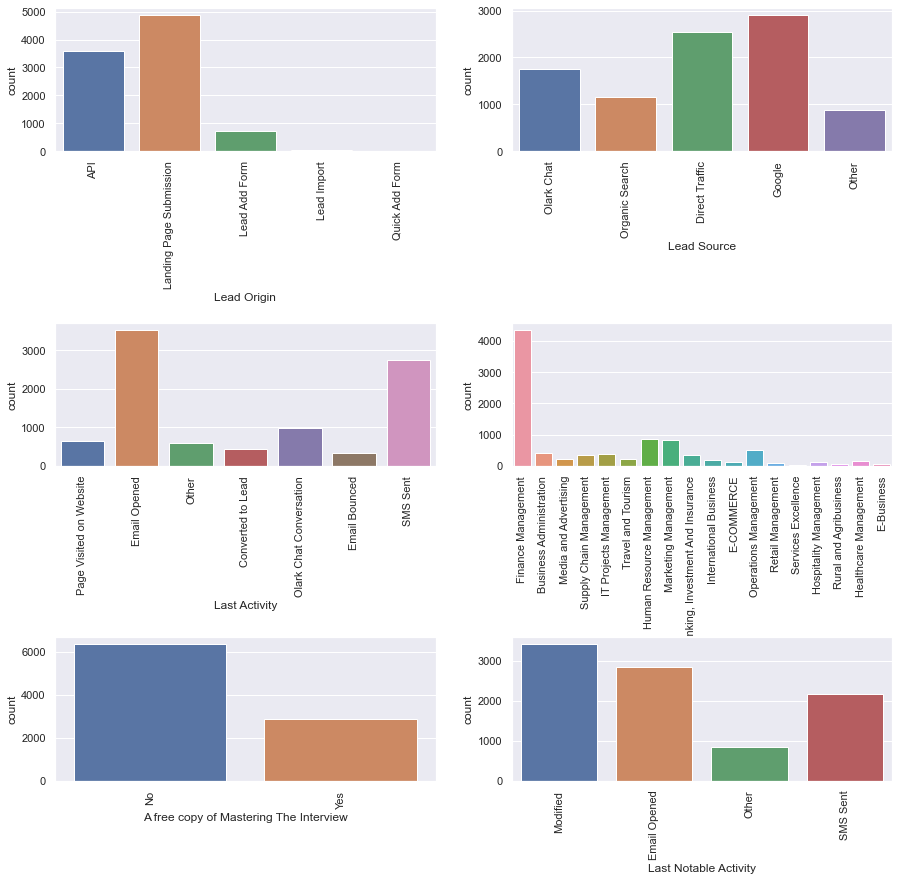

In [43]:
plt.figure(figsize=(15,20))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(col_obj):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(i[1],data=lead_df)
    plt.xticks(rotation=90)
plt.show()

### observation:
- In Lead Source Direct Traffic and Google are the two main source for Leads
- The Number of values is High in Email Opened and SMS Sent in Last Activity
- Most of the people chooses Finance Management Specialization rather than other Specialization
- The IT Project management have very lees so that most of the People not prefered this Specialization

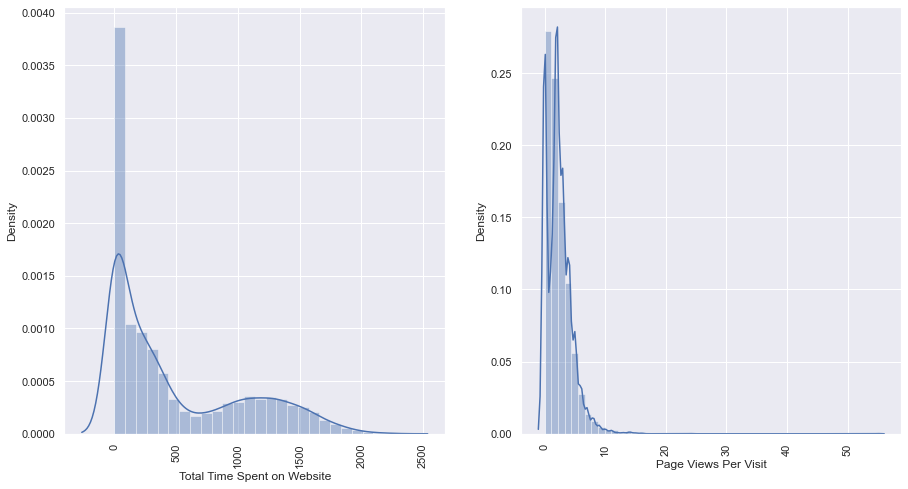

In [44]:
# Univariate Analysis (continuous)
col_num.remove('Converted')
plt.figure(figsize=(15,15))
plt.subplots_adjust(bottom=.01)
for i in enumerate(col_num):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(lead_df[i[1]])
    
    plt.xticks(rotation=90)
plt.show()

### Observation:
- None of the Continueous Variables are in Normal distribution
- Presence of Outliers in Total Visits and Page Views Per Visit
- In total visits more values is between 0-50 and page views per visits 0-20

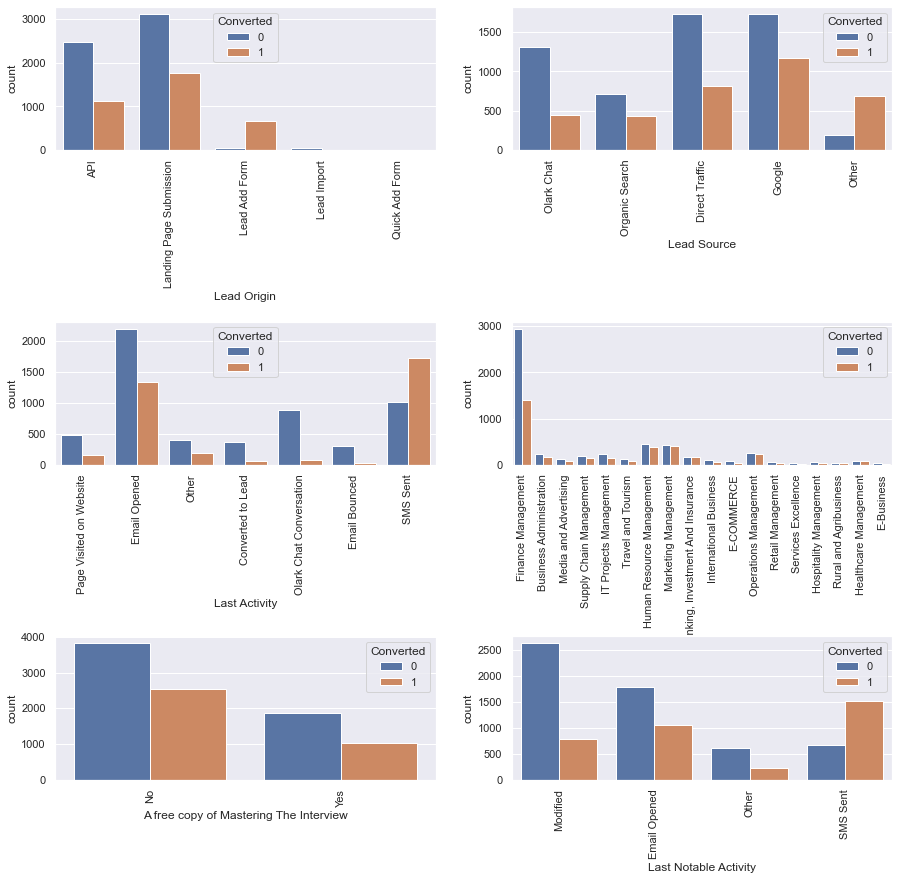

In [45]:
# Bivariate Analysis
plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(col_obj):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = lead_df)
    plt.xticks(rotation=90)
# plt.savefig('cate bivar.png',dpi=300,transparent=True)
plt.show()

### Observation:
- In Lead Source The number of Hot leads is higher in Direct Traffic and Google less in Other Category
- In Last Activity the number of Hot leads is higher in SMS and in EMAIL cold leads is higher than hot leads.
- In Last Notable Activity it's mostly same as Last Activity.
- In Specialization the most of the leads are comes from Finance management but here Hot leads are lesseer than Cold leads.

## Data Preparation and Feature selection

In [47]:
lead_df.head()

,Lead Origin,Lead Source,Converted,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,
660737,API,Olark Chat,0,0,0.0,Page Visited on Website,Finance Management,No,Modified
660728,API,Organic Search,0,674,2.5,Email Opened,Finance Management,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,305,1.0,Other,Media and Advertising,No,Modified
660681,Landing Page Submission,Google,1,1428,1.0,Converted to Lead,Finance Management,No,Modified


In [48]:
# mapping of columns 
lead_df['A free copy of Mastering The Interview']= lead_df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

In [49]:
# Dropping the Last Notable Activity as it is mostly same Last Activity
lead_df.drop('Last Notable Activity',1,inplace=True)

In [52]:
# creating dummies for categorical variables
dummies_df=pd.get_dummies(lead_df)
dummies_df.head()

,Converted,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
660728,0,674,2.5,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
660727,1,1532,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
660719,0,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
660681,1,1428,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
# creating dummies for categorical variables
dummies_df=pd.get_dummies(lead_df)
dummies_df.head()

,Converted,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
660728,0,674,2.5,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
660727,1,1532,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
660719,0,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
660681,1,1428,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
# Splitting the data into training and testing sets
X=dummies_df.iloc[:,1:]
y=dummies_df[['Converted']]

In [55]:
# dropping columns on basis of analysis
dummies_df=dummies_df.drop(['A free copy of Mastering The Interview','Lead Origin_Lead Add Form','Lead Source_Organic Search','Last Activity_Email Opened','Specialization_Operations Management'],1)

In [56]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=.7,test_size=.3,random_state=1)

In [57]:
#scaling the features
scaler=StandardScaler()
X_train[['Total Time Spent on Website','Page Views Per Visit']]=\
scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit']])

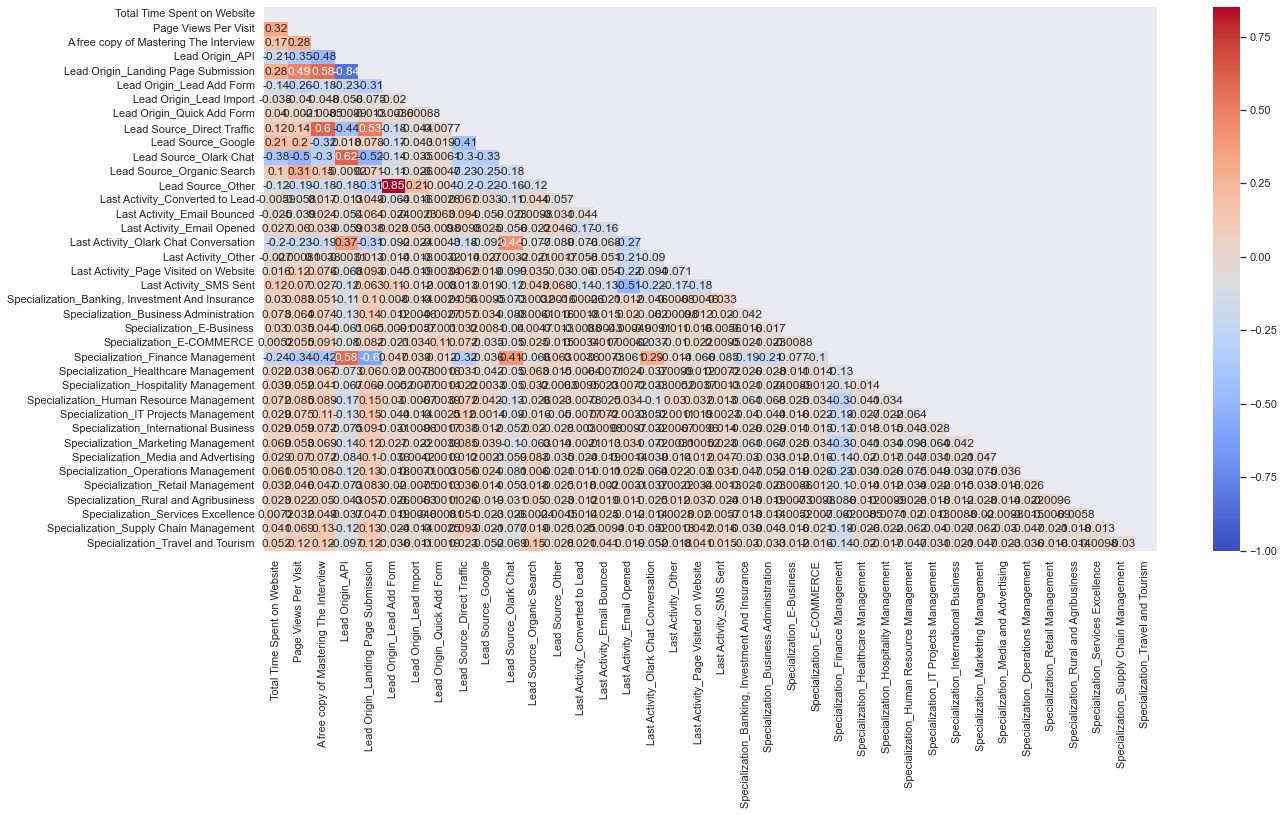

In [58]:
# Correlation
# Finding the Correlation using HeatMap
plt.figure(figsize = (20, 10))
mask = np.zeros(X_train.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(X_train.corr(), annot = True, vmin=-1,cmap='coolwarm',mask=mask)
plt.show()

#### Observation:
- we can see some columns are highly correlated.
- we have to use RFE to decide which column to drop.

In [59]:
# Using rfe for features selection
logreg=LogisticRegression()

In [61]:
# Running RFE with the output number of the variable equal to 20
rfe = RFE(logreg,n_features_to_select=20)    # running RFE
rfe.fit (X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [63]:
rfe.support_

array([ True, False, False,  True,  True,  True,  True, False,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
       False,  True, False, False, False, False,  True,  True,  True,
       False, False,  True, False, False,  True, False,  True,  True,
       False, False])

In [65]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('A free copy of Mastering The Interview', False, 13),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 7),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Other', False, 15),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', True, 1),
 ('Last Activity_Page Visited on Website', False, 16),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 2),
 ('Specialization_Business Administration', False, 12),
 ('Specialization_E-Business', F

In [66]:
# After used RFE here RFE selected these variables should be used for modeling
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_SMS Sent', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence'],
      dtype='object')

In [67]:
# After used RFE here RFE selected these variables should not be used for modeling
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Retail Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism'],
      dtype='object')

## Step 5: Building a Logistic Regression using statsmodel, for the detailed statistics

## Model 1

In [68]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2915.6
Date:                Mon, 14 Nov 2022   Deviance:                       5831.2
Time:                        20:11:35   Pearson chi2:                 6.68e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    18.2427   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Total Time Spent on Website               1.1069      0.038     28.886      0.000       1.032       1.182
Lead Origin_API                         -19.4712   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Landing Page Submission     -19.8160   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Add Form               -15.7059   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Import                 -19.5445   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Direct Traffic               -0.2984      0.084     -3.561      0.000      -0.463      -0.134
Lead Source_Olark Chat                    0.9812      0.116      8.445      0.000       0.753       1.209
Last Activity_Converted to Lead          -0.4441      0.232     -1.916      0.055      -0.899       0.010
Last Activity_Email Bounced              -1.2054      0.305     -3.949      0.000      -1.804      -0.607
Last Activity_Email Opened                0.6266      0.143      4.395      0.000       0.347       0.906
Last Activity_Olark Chat Conversation    -1.1395      0.211     -5.408      0.000      -1.552      -0.727
Last Activity_Other                       0.3592      0.185      1.941      0.052      -0.003       0.722
Last Activity_SMS Sent                    1.7031      0.145     11.759      0.000       1.419       1.987
Specialization_Finance Management        -0.4706      0.088     -5.367      0.000      -0.642      -0.299
Specialization_Healthcare Management      0.2062      0.241      0.855      0.393      -0.267       0.679
Specialization_Hospitality Management    -0.5855      0.312     -1.878      0.060      -1.197       0.026
Specialization_International Business    -0.3223      0.244     -1.319      0.187      -0.801       0.157
Specialization_Operations Management      0.1449      0.142      1.019      0.308      -0.134       0.424
Specialization_Rural and Agribusiness     0.2656      0.348      0.764      0.445      -0.416       0.947
Specialization_Services Excellence       -0.2911      0.513     -0.567      0.571      -1.297       0.715
=========================================================================================================
"""

In [69]:
# function to calculate vif
def vifcalc(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [70]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
2,Lead Origin_Landing Page Submission,9.20
1,Lead Origin_API,8.95
9,Last Activity_Email Opened,6.64
12,Last Activity_SMS Sent,5.33
13,Specialization_Finance Management,3.41
10,Last Activity_Olark Chat Conversation,2.93
6,Lead Source_Olark Chat,2.49
3,Lead Origin_Lead Add Form,2.38
5,Lead Source_Direct Traffic,1.95
11,Last Activity_Other,1.93


- 'Lead Source_Other' is insignificant because it has high p-value in presence of other variables so it should be dropped.

### Model2

In [73]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2915.6
Date:                Mon, 14 Nov 2022   Deviance:                       5831.2
Time:                        20:14:32   Pearson chi2:                 6.68e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    18.2427   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Total Time Spent on Website               1.1069      0.038     28.886      0.000       1.032       1.182
Lead Origin_API                         -19.4712   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Landing Page Submission     -19.8160   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Add Form               -15.7059   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Import                 -19.5445   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Direct Traffic               -0.2984      0.084     -3.561      0.000      -0.463      -0.134
Lead Source_Olark Chat                    0.9812      0.116      8.445      0.000       0.753       1.209
Last Activity_Converted to Lead          -0.4441      0.232     -1.916      0.055      -0.899       0.010
Last Activity_Email Bounced              -1.2054      0.305     -3.949      0.000      -1.804      -0.607
Last Activity_Email Opened                0.6266      0.143      4.395      0.000       0.347       0.906
Last Activity_Olark Chat Conversation    -1.1395      0.211     -5.408      0.000      -1.552      -0.727
Last Activity_Other                       0.3592      0.185      1.941      0.052      -0.003       0.722
Last Activity_SMS Sent                    1.7031      0.145     11.759      0.000       1.419       1.987
Specialization_Finance Management        -0.4706      0.088     -5.367      0.000      -0.642      -0.299
Specialization_Healthcare Management      0.2062      0.241      0.855      0.393      -0.267       0.679
Specialization_Hospitality Management    -0.5855      0.312     -1.878      0.060      -1.197       0.026
Specialization_International Business    -0.3223      0.244     -1.319      0.187      -0.801       0.157
Specialization_Operations Management      0.1449      0.142      1.019      0.308      -0.134       0.424
Specialization_Rural and Agribusiness     0.2656      0.348      0.764      0.445      -0.416       0.947
Specialization_Services Excellence       -0.2911      0.513     -0.567      0.571      -1.297       0.715
=========================================================================================================
"""

In [74]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
2,Lead Origin_Landing Page Submission,9.20
1,Lead Origin_API,8.95
9,Last Activity_Email Opened,6.64
12,Last Activity_SMS Sent,5.33
13,Specialization_Finance Management,3.41
10,Last Activity_Olark Chat Conversation,2.93
6,Lead Source_Olark Chat,2.49
3,Lead Origin_Lead Add Form,2.38
5,Lead Source_Direct Traffic,1.95
11,Last Activity_Other,1.93


- 'Specialization_Human Resource Management' is insignificant because it has high p-value in presence of other variables so it should be dropped.

### Model 3

In [76]:
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2915.6
Date:                Mon, 14 Nov 2022   Deviance:                       5831.2
Time:                        20:16:10   Pearson chi2:                 6.68e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    18.2427   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Total Time Spent on Website               1.1069      0.038     28.886      0.000       1.032       1.182
Lead Origin_API                         -19.4712   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Landing Page Submission     -19.8160   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Add Form               -15.7059   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Import                 -19.5445   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Direct Traffic               -0.2984      0.084     -3.561      0.000      -0.463      -0.134
Lead Source_Olark Chat                    0.9812      0.116      8.445      0.000       0.753       1.209
Last Activity_Converted to Lead          -0.4441      0.232     -1.916      0.055      -0.899       0.010
Last Activity_Email Bounced              -1.2054      0.305     -3.949      0.000      -1.804      -0.607
Last Activity_Email Opened                0.6266      0.143      4.395      0.000       0.347       0.906
Last Activity_Olark Chat Conversation    -1.1395      0.211     -5.408      0.000      -1.552      -0.727
Last Activity_Other                       0.3592      0.185      1.941      0.052      -0.003       0.722
Last Activity_SMS Sent                    1.7031      0.145     11.759      0.000       1.419       1.987
Specialization_Finance Management        -0.4706      0.088     -5.367      0.000      -0.642      -0.299
Specialization_Healthcare Management      0.2062      0.241      0.855      0.393      -0.267       0.679
Specialization_Hospitality Management    -0.5855      0.312     -1.878      0.060      -1.197       0.026
Specialization_International Business    -0.3223      0.244     -1.319      0.187      -0.801       0.157
Specialization_Operations Management      0.1449      0.142      1.019      0.308      -0.134       0.424
Specialization_Rural and Agribusiness     0.2656      0.348      0.764      0.445      -0.416       0.947
Specialization_Services Excellence       -0.2911      0.513     -0.567      0.571      -1.297       0.715
=========================================================================================================
"""

In [77]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
2,Lead Origin_Landing Page Submission,9.20
1,Lead Origin_API,8.95
9,Last Activity_Email Opened,6.64
12,Last Activity_SMS Sent,5.33
13,Specialization_Finance Management,3.41
10,Last Activity_Olark Chat Conversation,2.93
6,Lead Source_Olark Chat,2.49
3,Lead Origin_Lead Add Form,2.38
5,Lead Source_Direct Traffic,1.95
11,Last Activity_Other,1.93


- 'Lead Source_Google' is insignificant because it has high p-value in presence of other variables so it should be dropped.

### Model 4

In [79]:
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2915.6
Date:                Mon, 14 Nov 2022   Deviance:                       5831.2
Time:                        20:17:48   Pearson chi2:                 6.68e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    18.2427   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Total Time Spent on Website               1.1069      0.038     28.886      0.000       1.032       1.182
Lead Origin_API                         -19.4712   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Landing Page Submission     -19.8160   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Add Form               -15.7059   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Import                 -19.5445   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Source_Direct Traffic               -0.2984      0.084     -3.561      0.000      -0.463      -0.134
Lead Source_Olark Chat                    0.9812      0.116      8.445      0.000       0.753       1.209
Last Activity_Converted to Lead          -0.4441      0.232     -1.916      0.055      -0.899       0.010
Last Activity_Email Bounced              -1.2054      0.305     -3.949      0.000      -1.804      -0.607
Last Activity_Email Opened                0.6266      0.143      4.395      0.000       0.347       0.906
Last Activity_Olark Chat Conversation    -1.1395      0.211     -5.408      0.000      -1.552      -0.727
Last Activity_Other                       0.3592      0.185      1.941      0.052      -0.003       0.722
Last Activity_SMS Sent                    1.7031      0.145     11.759      0.000       1.419       1.987
Specialization_Finance Management        -0.4706      0.088     -5.367      0.000      -0.642      -0.299
Specialization_Healthcare Management      0.2062      0.241      0.855      0.393      -0.267       0.679
Specialization_Hospitality Management    -0.5855      0.312     -1.878      0.060      -1.197       0.026
Specialization_International Business    -0.3223      0.244     -1.319      0.187      -0.801       0.157
Specialization_Operations Management      0.1449      0.142      1.019      0.308      -0.134       0.424
Specialization_Rural and Agribusiness     0.2656      0.348      0.764      0.445      -0.416       0.947
Specialization_Services Excellence       -0.2911      0.513     -0.567      0.571      -1.297       0.715
=========================================================================================================
"""

In [80]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
2,Lead Origin_Landing Page Submission,9.20
1,Lead Origin_API,8.95
9,Last Activity_Email Opened,6.64
12,Last Activity_SMS Sent,5.33
13,Specialization_Finance Management,3.41
10,Last Activity_Olark Chat Conversation,2.93
6,Lead Source_Olark Chat,2.49
3,Lead Origin_Lead Add Form,2.38
5,Lead Source_Direct Traffic,1.95
11,Last Activity_Other,1.93


- 'Specialization_Business Administration' is insignificant because it has high p-value in presence of other variables so it should be dropped

## Model 5

In [82]:
X_train_sm=sm.add_constant(X_train[col])
logm5=sm.GLM(y_train,X_train_sm,families=sm.families.Binomial()).fit()
logm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Gaussian   Df Model:                           20
Link Function:               identity   Scale:                         0.14879
Method:                          IRLS   Log-Likelihood:                -3005.7
Date:                Mon, 14 Nov 2022   Deviance:                       959.25
Time:                        21:26:15   Pearson chi2:                     959.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.4638      0.387      1.197      0.231      -0.295       1.223
Total Time Spent on Website               0.1988      0.005     36.754      0.000       0.188       0.209
Lead Origin_API                          -0.1929      0.387     -0.498      0.618      -0.952       0.566
Lead Origin_Landing Page Submission      -0.2503      0.387     -0.647      0.518      -1.009       0.508
Lead Origin_Lead Add Form                 0.4108      0.388      1.060      0.289      -0.349       1.170
Lead Origin_Lead Import                  -0.2210      0.393     -0.562      0.574      -0.992       0.550
Lead Source_Direct Traffic               -0.0485      0.013     -3.802      0.000      -0.073      -0.023
Lead Source_Olark Chat                    0.1518      0.017      8.870      0.000       0.118       0.185
Last Activity_Converted to Lead          -0.0426      0.029     -1.476      0.140      -0.099       0.014
Last Activity_Email Bounced              -0.0975      0.031     -3.153      0.002      -0.158      -0.037
Last Activity_Email Opened                0.0993      0.020      4.975      0.000       0.060       0.138
Last Activity_Olark Chat Conversation    -0.1163      0.025     -4.603      0.000      -0.166      -0.067
Last Activity_Other                       0.0551      0.026      2.080      0.038       0.003       0.107
Last Activity_SMS Sent                    0.3064      0.020     14.977      0.000       0.266       0.347
Specialization_Finance Management        -0.0759      0.013     -5.912      0.000      -0.101      -0.051
Specialization_Healthcare Management      0.0371      0.038      0.987      0.324      -0.037       0.111
Specialization_Hospitality Management    -0.0770      0.045     -1.726      0.084      -0.164       0.010
Specialization_International Business    -0.0488      0.036     -1.338      0.181      -0.120       0.023
Specialization_Operations Management      0.0226      0.022      1.026      0.305      -0.021       0.066
Specialization_Rural and Agribusiness     0.0496      0.054      0.918      0.359      -0.056       0.156
Specialization_Services Excellence       -0.0412      0.075     -0.551      0.581      -0.188       0.105
=========================================================================================================
"""

In [83]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
2,Lead Origin_Landing Page Submission,9.20
1,Lead Origin_API,8.95
9,Last Activity_Email Opened,6.64
12,Last Activity_SMS Sent,5.33
13,Specialization_Finance Management,3.41
10,Last Activity_Olark Chat Conversation,2.93
6,Lead Source_Olark Chat,2.49
3,Lead Origin_Lead Add Form,2.38
5,Lead Source_Direct Traffic,1.95
11,Last Activity_Other,1.93


- 'Specialization_Other' is insignificant because it has high p-value in presence of other variables so it should be dropped

## Model 6

In [85]:
X_train_sm=sm.add_constant(X_train[col])
logm6=sm.GLM(y_train,X_train_sm,families=sm.families.Binomial()).fit()
logm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Gaussian   Df Model:                           20
Link Function:               identity   Scale:                         0.14879
Method:                          IRLS   Log-Likelihood:                -3005.7
Date:                Mon, 14 Nov 2022   Deviance:                       959.25
Time:                        21:28:02   Pearson chi2:                     959.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.4638      0.387      1.197      0.231      -0.295       1.223
Total Time Spent on Website               0.1988      0.005     36.754      0.000       0.188       0.209
Lead Origin_API                          -0.1929      0.387     -0.498      0.618      -0.952       0.566
Lead Origin_Landing Page Submission      -0.2503      0.387     -0.647      0.518      -1.009       0.508
Lead Origin_Lead Add Form                 0.4108      0.388      1.060      0.289      -0.349       1.170
Lead Origin_Lead Import                  -0.2210      0.393     -0.562      0.574      -0.992       0.550
Lead Source_Direct Traffic               -0.0485      0.013     -3.802      0.000      -0.073      -0.023
Lead Source_Olark Chat                    0.1518      0.017      8.870      0.000       0.118       0.185
Last Activity_Converted to Lead          -0.0426      0.029     -1.476      0.140      -0.099       0.014
Last Activity_Email Bounced              -0.0975      0.031     -3.153      0.002      -0.158      -0.037
Last Activity_Email Opened                0.0993      0.020      4.975      0.000       0.060       0.138
Last Activity_Olark Chat Conversation    -0.1163      0.025     -4.603      0.000      -0.166      -0.067
Last Activity_Other                       0.0551      0.026      2.080      0.038       0.003       0.107
Last Activity_SMS Sent                    0.3064      0.020     14.977      0.000       0.266       0.347
Specialization_Finance Management        -0.0759      0.013     -5.912      0.000      -0.101      -0.051
Specialization_Healthcare Management      0.0371      0.038      0.987      0.324      -0.037       0.111
Specialization_Hospitality Management    -0.0770      0.045     -1.726      0.084      -0.164       0.010
Specialization_International Business    -0.0488      0.036     -1.338      0.181      -0.120       0.023
Specialization_Operations Management      0.0226      0.022      1.026      0.305      -0.021       0.066
Specialization_Rural and Agribusiness     0.0496      0.054      0.918      0.359      -0.056       0.156
Specialization_Services Excellence       -0.0412      0.075     -0.551      0.581      -0.188       0.105
=========================================================================================================
"""

In [86]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
2,Lead Origin_Landing Page Submission,9.20
1,Lead Origin_API,8.95
9,Last Activity_Email Opened,6.64
12,Last Activity_SMS Sent,5.33
13,Specialization_Finance Management,3.41
10,Last Activity_Olark Chat Conversation,2.93
6,Lead Source_Olark Chat,2.49
3,Lead Origin_Lead Add Form,2.38
5,Lead Source_Direct Traffic,1.95
11,Last Activity_Other,1.93


- Here we got all the p-value are under 0.05 and VIF is also under 5
- It can take as a Final Model

In [87]:
# Prediciting values on ytrain
y_train_pred = logm6.predict(X_train_sm).values.reshape(-1)

In [88]:
y_train_pred_final = pd.DataFrame({'Converted':y_train['Converted'], 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.143691,609431
1,0,0.054260,631817
2,0,0.014733,596164
3,0,0.164295,646570
4,0,0.032208,643974


In [89]:
#  let's take 0.5 as Cutoff
y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_Prob'].apply(lambda x : 1 if x>0.5 else 0)

In [90]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred
0,0,0.143691,609431,0
1,0,0.054260,631817,0
2,0,0.014733,596164,0
3,0,0.164295,646570,0
4,0,0.032208,643974,0


In [91]:
# Finding the metrics like accuracy, sensitivity and specicity 
def metrices_(converted,predicted):
    cm1 = metrics.confusion_matrix(converted,predicted)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    return accuracy,sensi,speci

In [92]:
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.Converted_pred)

print('Accuracy: {}, Sensitivity {}, specitiy {}'.format(acc,sensi,speci))

Accuracy: 0.788961038961039, Sensitivity 0.6269261962692619, specitiy 0.8888055972013993


- Here we got low Sensitivity when randomly take the Cutoff as 0.5

In [93]:
# Finding the Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3557,  445],
       [ 920, 1546]], dtype=int64)

In [94]:
# Finding the TP, TN, FP, FN
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negative

In [95]:
# Calculate false postive rate -
print(FP/ float(TN+FP))

0.1111944027986007


In [96]:
# positive predictive value 
print (TP / float(TP+FP))

0.7764942240080361


In [97]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7945052490507036


In [98]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
#     plt.savefig('Roc.png',dpi=300,transparent=True)
    plt.show()
    

    return None

In [99]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

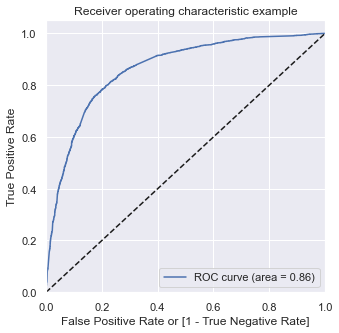

In [100]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [101]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.143691,609431,0,1,1,0,0,0,0,0,0,0,0
1,0,0.054260,631817,0,1,0,0,0,0,0,0,0,0,0
2,0,0.014733,596164,0,1,0,0,0,0,0,0,0,0,0
3,0,0.164295,646570,0,1,1,0,0,0,0,0,0,0,0
4,0,0.032208,643974,0,1,0,0,0,0,0,0,0,0,0


In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.420841  0.995134  0.066967
0.1   0.1  0.567100  0.975669  0.315342
0.2   0.2  0.665275  0.939173  0.496502
0.3   0.3  0.762832  0.867397  0.698401
0.4   0.4  0.792672  0.781427  0.799600
0.5   0.5  0.788961  0.626926  0.888806
0.6   0.6  0.765615  0.502839  0.927536
0.7   0.7  0.743352  0.399838  0.955022
0.8   0.8  0.696506  0.240065  0.977761
0.9   0.9  0.672233  0.160178  0.987756


<Figure size 1440x1080 with 0 Axes>

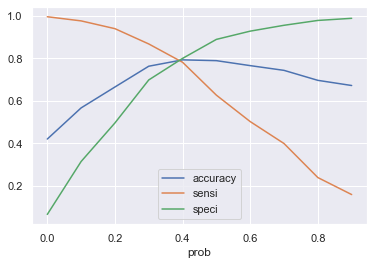

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(20,15))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
# plt.savefig('acc_s_s_curve',dpi=300,transparent=True)
plt.show()

- Taking value 3.7 as the Final Cutoff

In [104]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.143691,609431,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.054260,631817,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.014733,596164,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.164295,646570,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.032208,643974,0,1,0,0,0,0,0,0,0,0,0,0


In [105]:
# Printing the Metrics Accuracy, Sensitivity, Specicity
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
print('Accuracy: {}, Sensitivity {}, specifitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.786178107606679, Sensitivity 0.8102189781021898, specifitiy 0.7713643178410795  


In [106]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred )
confusion

array([[3557,  445],
       [ 920, 1546]], dtype=int64)

In [107]:
# Finding the Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.685890834191555

In [108]:
# Finding the Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8102189781021898

In [109]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

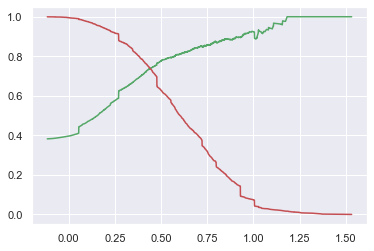

In [110]:
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')
# plt.savefig('precision-recall_curve',dpi=300,transparent=True)
plt.show()

- Here we got 0.37 as the Cut-off as Precesion-Recall Thresholdm

## Making Prediction on test set

- Scaling on Test Set

In [113]:
X_test[['Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit']])

In [114]:
#Adding constant
X_test_sm = sm.add_constant(X_test[col])
#Making prediction
y_test_pred = logm6.predict(X_test_sm)
y_test_pred[:10]

Lead Number
639211    0.712231
590711    0.881320
644174    0.462164
641392    0.335682
587955    0.748202
593130    0.064309
648319    0.054260
636722    0.970157
648231    0.785390
637858    0.262931
dtype: float64

In [115]:
# Converting y_pred to a dataframe which is an array
y_pred_test = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [116]:
# Removing index for both dataframes to append them side by side 
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [117]:
# Appending y_test_df and y_pred_test
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [118]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,639211,0.712231
1,1,590711,0.881320
2,1,644174,0.462164
3,0,641392,0.335682
4,1,587955,0.748202


In [119]:
y_pred_final['final_test_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [120]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_test_predicted
0,1,639211,0.712231,1
1,1,590711,0.881320,1
2,1,644174,0.462164,1
3,0,641392,0.335682,0
4,1,587955,0.748202,1


In [122]:
acc,sensi,speci=metrices_(y_pred_final.Converted,y_pred_final.final_test_predicted)

In [123]:
print('Accuracy: {}, Sensitivity {}, specitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.775974025974026, Sensitivity 0.7990867579908676, specitiy 0.7608825283243887  


- We can see that our model is doing well in test set.
- Sensitivity means how our model is telling that actually converted and model prdecited them as as converted.
- We can see that our model is giving about 0.80 sensitivity.
- It means that 80 percent time our model is able to predict (actually)converted as (prdicited)converted.

### Assigning Lead Score in the data frame with respect to Lead Number

In [124]:
# making new df with lead score
lead_scorer_df=pd.DataFrame()
df1=y_train_pred_final[['Lead Number','Converted_Prob']]
df2=y_pred_final[['Lead Number','Converted_Prob']]

In [125]:
lead_scorer_df=df1.append(df2,ignore_index=True)

In [126]:
# Assigning the value to the Lead Score by Multiplying 100
lead_scorer_df['Lead Score']=lead_scorer_df['Converted_Prob'].apply(lambda x: round((x*100),2))

In [127]:
# dropping Converted_Prob
lead_scorer_df.drop('Converted_Prob',1,inplace=True)
lead_scorer_df.head()

,Lead Number,Lead Score
0,609431,14.37
1,631817,5.43
2,596164,1.47
3,646570,16.43
4,643974,3.22


- Got the Lead Score with respect to Lead Number.

### Conclusion :-
- We have noted that the variables that important the most in the potential buyers are:
- The total time spend on the Website.
- Total number of visits.
- When the lead source was: a. Google b. Direct traffic c. Organic search d. Olark Chat
- When the last activity was: a. SMS b. Olark chat conversation
- When the lead origin is Lead add format.